# Exploratory Data Analysis

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Necessary Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
! pip install shap
import shap
sns.set_theme(style="whitegrid")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 6.8 MB/s eta 0:00:00


## Loading the data in the respective dataframes

In [ ]:
allergies_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/allergies.csv')

In [ ]:
careplans_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/careplans.csv')

In [ ]:
conditions_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/conditions.csv')

In [ ]:
devices_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/devices.csv')

In [ ]:
encounters_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/encounters.csv') #*

In [ ]:
imaging_studies_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/imaging_studies.csv')

In [ ]:
immunizations_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/immunizations.csv')

In [ ]:
medications_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/medications.csv') #*

In [ ]:
observations_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/observations.csv') #*

In [ ]:
organizations_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/organizations.csv')

In [ ]:
patients_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/patients.csv')

In [ ]:
payer_transitions_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/payer_transitions.csv')

In [ ]:
payers_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/payers.csv')

In [ ]:
procedures_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/procedures.csv')

In [ ]:
providers_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/providers.csv')

In [ ]:
supplies_df = pd.read_csv('drive/MyDrive/BMIN_522_Project/dataset/covid19/supplies.csv')

## Preprocessing individual dataframes

### Allergies

In [ ]:
# Viewing the dataset
allergies_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1983-01-22,NaN,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,424213003,Allergy to bee venom
1,1983-01-22,NaN,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,418689008,Allergy to grass pollen
2,1983-01-22,NaN,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,419263009,Allergy to tree pollen
3,1983-01-22,NaN,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,417532002,Allergy to fish
4,2002-02-24,NaN,29581d13-2687-402f-9c4c-06141a319e61,1d1e8b9d-00c5-47dc-a635-16769715d7cc,91934008,Allergy to nut


In [ ]:
# Shape of the dataset
print("Size of Allergies dataset is: ", allergies_df.shape)

Size of Allergies dataset is:  (51592, 6)


In [ ]:
# Null values
allergies_df.isna().sum()

START              0
STOP           51028
PATIENT            0
ENCOUNTER          0
CODE               0
DESCRIPTION        0
dtype: int64

[Text(0, 0, 'Allergy to mould'),
 Text(1, 0, 'Allergy to nut'),
 Text(2, 0, 'Allergy to tree pollen'),
 Text(3, 0, 'Allergy to bee venom'),
 Text(4, 0, 'Allergy to wheat'),
 Text(5, 0, 'Latex allergy'),
 Text(6, 0, 'Allergy to peanuts'),
 Text(7, 0, 'Allergy to soya'),
 Text(8, 0, 'Shellfish allergy'),
 Text(9, 0, 'Allergy to fish'),
 Text(10, 0, 'Dander (animal) allergy'),
 Text(11, 0, 'Allergy to grass pollen'),
 Text(12, 0, 'Allergy to eggs'),
 Text(13, 0, 'House dust mite allergy'),
 Text(14, 0, 'Allergy to dairy product')]

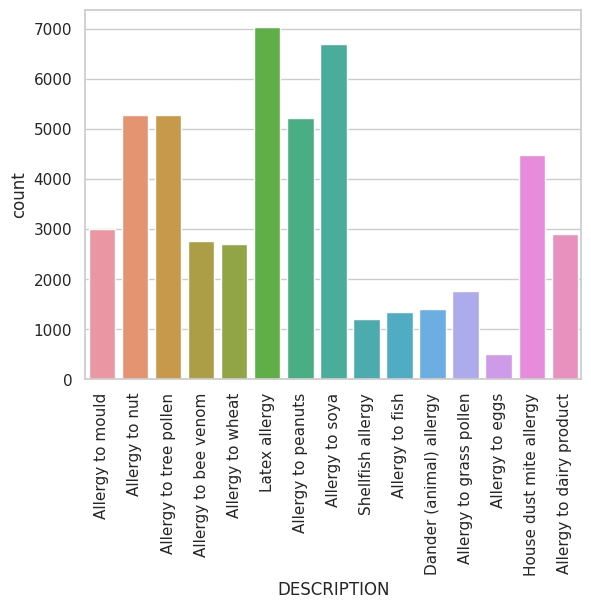

In [ ]:
# Plotting the distribution of allergy types
g1 = sns.countplot(x=allergies_df['DESCRIPTION'])
g1.set_xticklabels(
    labels= list(set(allergies_df["DESCRIPTION"])), rotation=90)

Since more than 98% of the data is missing for the column 'STOP', we will drop it from the dataframe

In [ ]:
# Dropping the column STOP
allergies_df = allergies_df.drop(columns = ['STOP'])
allergies_df.head()

,START,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1983-01-22,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,424213003,Allergy to bee venom
1,1983-01-22,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,418689008,Allergy to grass pollen
2,1983-01-22,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,419263009,Allergy to tree pollen
3,1983-01-22,da454f92-9e90-43f8-9514-550fbaa6de3d,ddebd8f1-c2fa-4958-a19e-2e55810bcfd6,417532002,Allergy to fish
4,2002-02-24,29581d13-2687-402f-9c4c-06141a319e61,1d1e8b9d-00c5-47dc-a635-16769715d7cc,91934008,Allergy to nut


### Careplans

In [ ]:
# Viewing the dataset
careplans_df.head()

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,ed87cb74-1c58-482c-a809-36307a961955,2020-03-01,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19
1,3d0f0d4a-03f7-4714-a9fd-04634af395f0,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,736376001,Infectious disease care plan (record artifact),840539006.0,COVID-19
2,666f9af9-e8ed-4475-bc0a-bbb255b1c773,2020-02-12,2020-02-26,9bcf6ed5-d808-44af-98a0-7d78a29ede72,5d9dfe80-7edf-4181-9753-770e361934d1,91251008,Physical therapy procedure,44465007.0,Sprain of ankle
3,21f3ecc9-32d0-4926-a939-e076a1d813a4,2020-03-13,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19
4,7084b92a-9c76-4f3e-ac1d-3b55da945699,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,736376001,Infectious disease care plan (record artifact),840539006.0,COVID-19


In [ ]:
# Shape of the dataset
print("Size of Careplans dataset is: ", careplans_df.shape)

Size of Careplans dataset is:  (377726, 9)


In [ ]:
# Null values
careplans_df.isna().sum()

Id                        0
START                     0
STOP                 177414
PATIENT                   0
ENCOUNTER                 0
CODE                      0
DESCRIPTION               0
REASONCODE            30256
REASONDESCRIPTION     30256
dtype: int64

In [ ]:
# Determining the number of rows for COVID-19 or suspected COVID-19
careplans_df['REASONDESCRIPTION'].value_counts()

Suspected COVID-19                                          91039
COVID-19                                                    70536
Prediabetes                                                 35819
Hypertension                                                32560
Acute bronchitis (disorder)                                 15993
                                                            ...  
Lupus erythematosus                                            10
Attempted suicide - suffocation                                 7
Pyelonephritis                                                  5
Fracture of the vertebral column with spinal cord injury        3
At risk for suicide (finding)                                   1
Name: REASONDESCRIPTION, Length: 75, dtype: int64

Since we are focusing only on COVID-19 and Suspected COVID-19, we can drop the patient rows in careplans_df who seeked treatment for reasons other than the two mentioned above, as well as for patients, whose 'REASONDESCRIPTION' column was NULL

In [ ]:
careplans_df = careplans_df.dropna(subset=['REASONCODE', 'REASONDESCRIPTION'])
careplans_df.head()

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,ed87cb74-1c58-482c-a809-36307a961955,2020-03-01,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19
1,3d0f0d4a-03f7-4714-a9fd-04634af395f0,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,736376001,Infectious disease care plan (record artifact),840539006.0,COVID-19
2,666f9af9-e8ed-4475-bc0a-bbb255b1c773,2020-02-12,2020-02-26,9bcf6ed5-d808-44af-98a0-7d78a29ede72,5d9dfe80-7edf-4181-9753-770e361934d1,91251008,Physical therapy procedure,44465007.0,Sprain of ankle
3,21f3ecc9-32d0-4926-a939-e076a1d813a4,2020-03-13,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19
4,7084b92a-9c76-4f3e-ac1d-3b55da945699,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,736376001,Infectious disease care plan (record artifact),840539006.0,COVID-19


In [ ]:
careplans_df = careplans_df.loc[((careplans_df['REASONDESCRIPTION'] == 'COVID-19') | (careplans_df['REASONDESCRIPTION'] == 'Suspected COVID-19'))]
careplans_df.head()

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,ed87cb74-1c58-482c-a809-36307a961955,2020-03-01,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19
1,3d0f0d4a-03f7-4714-a9fd-04634af395f0,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,736376001,Infectious disease care plan (record artifact),840539006.0,COVID-19
3,21f3ecc9-32d0-4926-a939-e076a1d813a4,2020-03-13,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19
4,7084b92a-9c76-4f3e-ac1d-3b55da945699,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,736376001,Infectious disease care plan (record artifact),840539006.0,COVID-19
6,74f3d81f-2ada-44e1-9828-c5407b9234eb,2020-03-10,2020-03-10,5163c501-353c-4a82-b863-a3f1df2d6cf1,f26c8d54-0e02-402b-9e98-13be78607b6b,736376001,Infectious disease care plan (record artifact),840544004.0,Suspected COVID-19


In [ ]:
# Shape of the dataset AFTER preprocessing
print("Size of Careplans dataset is: ", careplans_df.shape)

Size of Careplans dataset is:  (161575, 9)


In [ ]:
print(list(set(careplans_df['DESCRIPTION'])))
print(len(list(set(careplans_df['DESCRIPTION']))))

['Infectious disease care plan (record artifact)']
1


Therefore, we can conclude that when the patient belonged to either of the categories (COVID-19 or Suspected COVID-19), the treatment plan was the same - 'Infectious disease careplan (record artifact). Therefore, treatment plan is not a very important feature for our risk prediction model

### Conditions


In [ ]:
# Viewing the dataset
conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,d317dacb-d801-4136-be7d-440094f7ae83,65363002,Otitis media
1,2019-10-30,2020-01-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,759cfd9c-b40b-45df-a5b2-fca418027a6a,65363002,Otitis media
2,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,386661006,Fever (finding)
3,2020-03-01,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,840544004,Suspected COVID-19
4,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,840539006,COVID-19


In [ ]:
# Shape of the dataset
print("Size of Conditions dataset is: ", conditions_df.shape)

Size of Conditions dataset is:  (1143900, 6)


In [ ]:
# Null values
conditions_df.isna().sum()

START               0
STOP           516578
PATIENT             0
ENCOUNTER           0
CODE                0
DESCRIPTION         0
dtype: int64

In [ ]:
# Determining the number of rows for COVID-19 or suspected COVID-19
conditions_df['DESCRIPTION'].value_counts()

Suspected COVID-19                              91039
COVID-19                                        88166
Fever (finding)                                 80865
Cough (finding)                                 61710
Body mass index 30+ - obesity (finding)         50206
                                                ...  
Pyelonephritis                                      5
Meconium Ileus                                      4
History of upper limb amputation (situation)        3
Suicidal deliberate poisoning                       2
Attempted suicide - cut/stab                        1
Name: DESCRIPTION, Length: 191, dtype: int64

In [ ]:
conditions_df = conditions_df.dropna(subset=['DESCRIPTION'])
conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,d317dacb-d801-4136-be7d-440094f7ae83,65363002,Otitis media
1,2019-10-30,2020-01-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,759cfd9c-b40b-45df-a5b2-fca418027a6a,65363002,Otitis media
2,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,386661006,Fever (finding)
3,2020-03-01,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,840544004,Suspected COVID-19
4,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,840539006,COVID-19


In [ ]:
conditions_df = conditions_df.loc[((conditions_df['DESCRIPTION'] == 'COVID-19') | (conditions_df['DESCRIPTION'] == 'Suspected COVID-19'))]
conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
3,2020-03-01,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,840544004,Suspected COVID-19
4,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,840539006,COVID-19
10,2020-03-13,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,840544004,Suspected COVID-19
11,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,840539006,COVID-19
16,2020-03-10,2020-03-10,5163c501-353c-4a82-b863-a3f1df2d6cf1,f26c8d54-0e02-402b-9e98-13be78607b6b,840544004,Suspected COVID-19


In [ ]:
# Shape of the dataset AFTER preprocessing
print("Size of Conditions dataset is: ", conditions_df.shape)

Size of Conditions dataset is:  (179205, 6)


Since the column `DESCRIPTION` of the table `conditions_df` contains the same column as that of the table `encounters_df`, we will only use `encounters_df`.

### Devices

In [ ]:
# Viewing the dataset
devices_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,1986-07-04,NaN,7e2c6949-dce9-44be-b6ef-50aca95840d7,88f42ade-3921-4432-b53c-20f2231a6e87,72506001,Implantable defibrillator device (physical ob...,(01)32509593087287(11)860613(17)110628(10)6374...
1,2020-03-05,2020-03-11,a89e2d41-db41-4bf2-8e7d-f315743219dd,47d7e44e-94df-461f-b8a3-d84f07541fe1,449071006,Mechanical ventilator (physical object),(01)51467824701974(11)200213(17)450227(10)6798...
2,2020-03-05,2020-03-05,a89e2d41-db41-4bf2-8e7d-f315743219dd,47d7e44e-94df-461f-b8a3-d84f07541fe1,448907002,Videolaryngoscope (physical object),(01)46214226835296(11)200213(17)450227(10)6151...
3,2020-03-05,2020-03-05,a89e2d41-db41-4bf2-8e7d-f315743219dd,47d7e44e-94df-461f-b8a3-d84f07541fe1,36965003,Hemodialysis machine device (physical object),(01)26706893695172(11)200213(17)450227(10)8603...
4,2020-03-06,2020-03-06,a89e2d41-db41-4bf2-8e7d-f315743219dd,47d7e44e-94df-461f-b8a3-d84f07541fe1,36965003,Hemodialysis machine device (physical object),(01)14121876319892(11)200214(17)450228(10)8066...


In [ ]:
# Shape of the dataset
print("Size of Devices dataset is: ", devices_df.shape)

Size of Devices dataset is:  (23694, 7)


In [ ]:
# Null values
devices_df.isna().sum()

START             0
STOP           8692
PATIENT           0
ENCOUNTER         0
CODE              0
DESCRIPTION       0
UDI               0
dtype: int64

In [ ]:
# Dropping UDI column
devices_df = devices_df.drop(columns=['UDI'])

[Text(0, 0, 'Implantable defibrillator  device (physical object)'),
 Text(1, 0, 'Videolaryngoscope (physical object)'),
 Text(2, 0, 'Mechanical ventilator (physical object)'),
 Text(3, 0, 'Implantable cardiac pacemaker (physical object)'),
 Text(4, 0, 'Hemodialysis machine  device (physical object)'),
 Text(5, 0, 'Coronary artery stent (physical object)')]

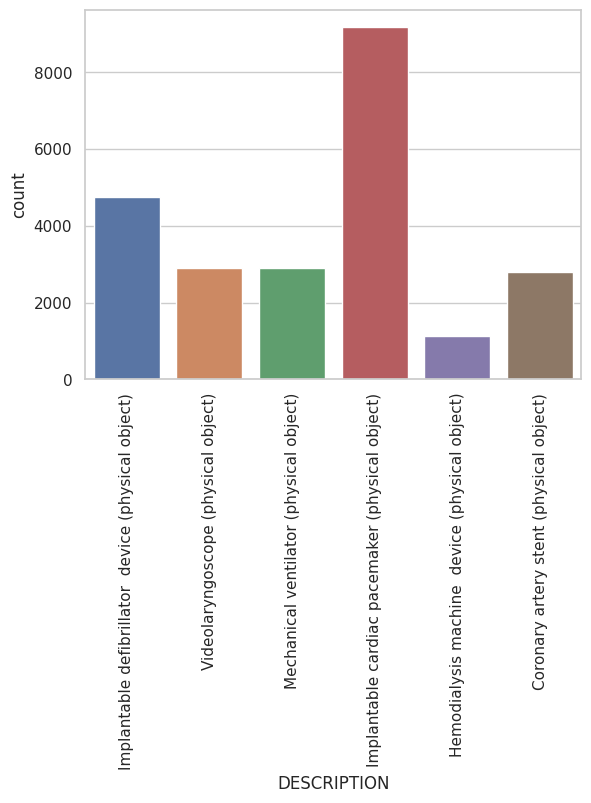

In [ ]:
# Plotting the distribution of types of devices
g2 = sns.countplot(x=devices_df['DESCRIPTION'])
g2.set_xticklabels(
    labels= list(set(devices_df['DESCRIPTION'])), rotation=90)

### Encounters

In [ ]:
# Viewing the dataset
encounters_df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d317dacb-d801-4136-be7d-440094f7ae83,2019-02-16T01:43:20Z,2019-02-16T01:58:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,5103c940-0c08-392f-95cd-446e0cea042a,8b532fbe-4254-3a60-a442-33028916d24e,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185345009,Encounter for symptom,129.16,129.16,69.16,65363002.0,Otitis media
1,52051c30-c6c3-45fe-b5da-a790f1680e91,2019-08-02T01:43:20Z,2019-08-02T02:13:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,0b9f3f7c-8ab6-30a5-b3ae-4dc0e0c00cb3,872f1318-45f7-34cc-adc7-26d59fc7c203,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,410620009,Well child visit (procedure),129.16,129.16,129.16,NaN,NaN
2,759cfd9c-b40b-45df-a5b2-fca418027a6a,2019-10-31T01:43:20Z,2019-10-31T01:58:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,5103c940-0c08-392f-95cd-446e0cea042a,8b532fbe-4254-3a60-a442-33028916d24e,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185345009,Encounter for symptom,129.16,129.16,69.16,65363002.0,Otitis media
3,20032279-0deb-41f9-bea4-93710396eb95,2020-01-31T01:43:20Z,2020-01-31T01:58:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,0b9f3f7c-8ab6-30a5-b3ae-4dc0e0c00cb3,872f1318-45f7-34cc-adc7-26d59fc7c203,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,410620009,Well child visit (procedure),129.16,129.16,129.16,NaN,NaN
4,60584c6a-e26b-4176-a660-86ad84c7ceca,2020-03-02T01:43:20Z,2020-03-02T02:39:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,fd328395-ab1d-35c6-a2d0-d05a9a79cf11,595c4f10-bcce-3892-a5d2-f95e3ab2ab74,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185345009,Encounter for symptom (procedure),129.16,129.16,69.16,NaN,NaN


In [ ]:
# Shape of the dataset
print("Size of Encounters dataset is: ", encounters_df.shape)

Size of Encounters dataset is:  (3188675, 15)


In [ ]:
# Different conditions identified in patient encounters
list(set(encounters_df['REASONDESCRIPTION']))

[nan,
 'Malignant neoplasm of breast (disorder)',
 'Small cell carcinoma of lung (disorder)',
 'Tubal pregnancy',
 'Chronic intractable migraine without aura',
 'Injury of medial collateral ligament of knee',
 "Alzheimer's disease (disorder)",
 'Death due to acute respiratory failure',
 'Myocardial Infarction',
 'Chronic pain',
 'Neoplasm of prostate',
 'Perennial allergic rhinitis with seasonal variation',
 'Neuropathy due to type 2 diabetes mellitus (disorder)',
 'Perennial allergic rhinitis',
 'Seizure disorder',
 'Anemia (disorder)',
 'Burn injury(morphologic abnormality)',
 'First degree burn',
 'Sepsis of Pseudomonas',
 'Hyperlipidemia',
 'Closed fracture of hip',
 'Attempted suicide - suffocation',
 'Acute bronchitis (disorder)',
 'Rheumatoid arthritis',
 'Childhood asthma',
 'Pneumonia (disorder)',
 'Sepsis caused by Pseudomonas (disorder)',
 'Atopic dermatitis',
 'Chronic congestive heart failure (disorder)',
 'Drug overdose',
 'Chronic obstructive bronchitis (disorder)',
 'Fr

In [ ]:
# Dropping any rows with missing REASON DESCRIPTION
encounters_df = encounters_df.dropna(subset=['REASONDESCRIPTION'])
encounters_df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d317dacb-d801-4136-be7d-440094f7ae83,2019-02-16T01:43:20Z,2019-02-16T01:58:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,5103c940-0c08-392f-95cd-446e0cea042a,8b532fbe-4254-3a60-a442-33028916d24e,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185345009,Encounter for symptom,129.16,129.16,69.16,65363002.0,Otitis media
2,759cfd9c-b40b-45df-a5b2-fca418027a6a,2019-10-31T01:43:20Z,2019-10-31T01:58:20Z,1ff7f10f-a204-4bb1-aa72-dd763fa99482,5103c940-0c08-392f-95cd-446e0cea042a,8b532fbe-4254-3a60-a442-33028916d24e,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185345009,Encounter for symptom,129.16,129.16,69.16,65363002.0,Otitis media
9,794aac2b-0eb8-4c36-98bb-a4317b344e6e,2020-04-28T08:43:12Z,2020-04-28T09:13:12Z,9bcf6ed5-d808-44af-98a0-7d78a29ede72,3bd5eda0-16da-3ba5-8500-4dfd6ae118b8,7b23db63-1dcb-38c0-890b-81fc2df959e0,4d71f845-a6a9-3c39-b242-14d25ef86a8d,ambulatory,185345009,Encounter for symptom,129.16,129.16,64.16,43878008.0,Streptococcal sore throat (disorder)
10,eafeb7a5-8033-4686-aeb7-e021698902ff,2008-12-15T04:56:33Z,2008-12-15T05:22:33Z,5163c501-353c-4a82-b863-a3f1df2d6cf1,b1ddf812-1fdd-3adf-b1d5-32cc8bd07ebb,a5dc3e9e-6f50-3c01-a911-558bf8c57bd5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,129.16,129.16,59.16,10509002.0,Acute bronchitis (disorder)
15,f2df2577-f1ff-4e0f-a467-8f72d494f478,2020-05-03T04:56:33Z,2020-05-03T05:11:33Z,5163c501-353c-4a82-b863-a3f1df2d6cf1,b1ddf812-1fdd-3adf-b1d5-32cc8bd07ebb,a5dc3e9e-6f50-3c01-a911-558bf8c57bd5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,129.16,129.16,59.16,10509002.0,Acute bronchitis (disorder)


In [ ]:
# Keeping only rows for COVID-19
encounters_df = encounters_df.loc[((encounters_df['REASONDESCRIPTION'] == 'COVID-19') | (encounters_df['REASONDESCRIPTION'] == 'Suspected COVID-19'))]
encounters_df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
23,b7455838-3607-47f4-aaa5-fd89abea7d29,2020-02-19T06:11:02Z,2020-03-05T15:37:02Z,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,fbf6180e-b800-3ebe-b91d-93d0288c400e,7502b497-e32c-32d3-a0b8-f18f540a8a45,4d71f845-a6a9-3c39-b242-14d25ef86a8d,inpatient,1505002,Hospital admission for isolation (procedure),129.16,129.16,64.16,840539006.0,COVID-19
146,60b6cbc7-bbee-4fdd-9283-e8462a56dc34,2020-03-07T13:40:50Z,2020-03-28T18:09:50Z,3c3b89b1-cb41-4f94-9193-2f3da4fe38e5,d692e283-0833-3201-8e55-4f868a9c0736,fb4c9467-dba4-387c-9148-c8d578fd1edf,047f6ec3-6215-35eb-9608-f9dda363a44c,inpatient,1505002,Hospital admission for isolation (procedure),129.16,129.16,69.16,840539006.0,COVID-19
253,7c4dcdf1-2c3b-4d53-a462-b1e5f62d4a82,2020-03-01T03:27:31Z,2020-03-07T05:40:31Z,7e2c6949-dce9-44be-b6ef-50aca95840d7,465de31f-3098-365c-af70-48a071e1f5aa,84a692b5-42c9-39cf-9ffa-9a8304e00181,047f6ec3-6215-35eb-9608-f9dda363a44c,inpatient,1505002,Hospital admission for isolation (procedure),129.16,129.16,69.16,840539006.0,COVID-19
281,4e304862-fd1d-4787-8f44-1b17019c73b2,2020-03-15T01:13:04Z,2020-04-02T07:06:04Z,0ab3b40f-3afd-42b8-9755-5834aa42eb67,6f122869-a856-3d65-8db9-099bf4f5bbb8,b394de28-e171-3124-a0d7-3be67982bbbc,047f6ec3-6215-35eb-9608-f9dda363a44c,inpatient,1505002,Hospital admission for isolation (procedure),129.16,129.16,69.16,840539006.0,COVID-19
421,f6f6f3f9-631d-4644-bdbe-2fc126c83afd,2020-03-10T05:23:24Z,2020-03-24T10:24:24Z,346b2b95-b8c5-4fe1-acf3-94de7e6e965b,d692e283-0833-3201-8e55-4f868a9c0736,fb4c9467-dba4-387c-9148-c8d578fd1edf,d47b3510-2895-3b70-9897-342d681c769d,inpatient,1505002,Hospital admission for isolation (procedure),129.16,129.16,49.16,840539006.0,COVID-19


In [ ]:
# Shape of the dataset AFTER preprocessing
print("Size of Encounters dataset is: ", encounters_df.shape)

Size of Encounters dataset is:  (26554, 15)


[Text(0, 0, 'Death Certification'),
 Text(1, 0, 'Hospital admission for isolation (procedure)'),
 Text(2, 0, 'Hospital admission  for observation (procedure)'),
 Text(3, 0, 'Admission to intensive care unit (procedure)')]

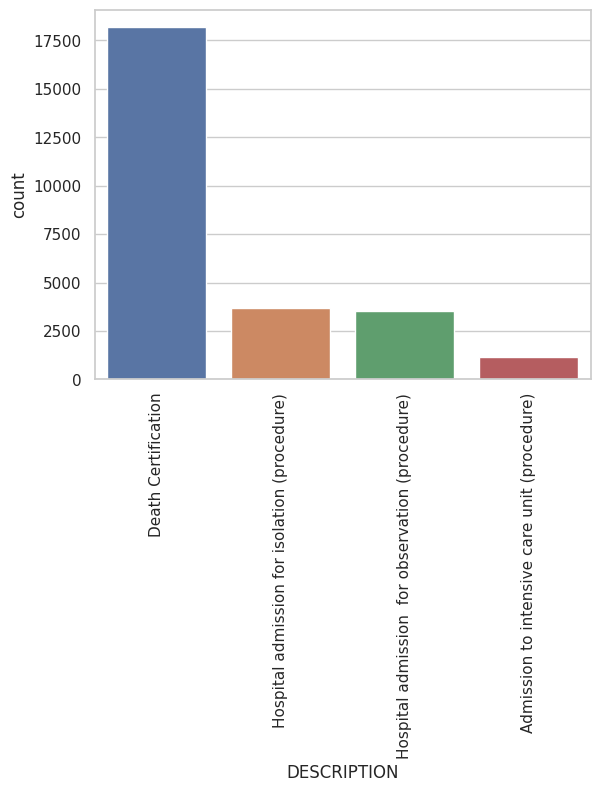

In [ ]:
# Plotting the frequency distribution of admission outcomes for COVID-19 patients
g3 = sns.countplot(x=encounters_df['DESCRIPTION'])
g3.set_xticklabels(
    labels= list(set(encounters_df['DESCRIPTION'])), rotation=90)

[Text(0, 0, 'inpatient'), Text(1, 0, 'wellness')]

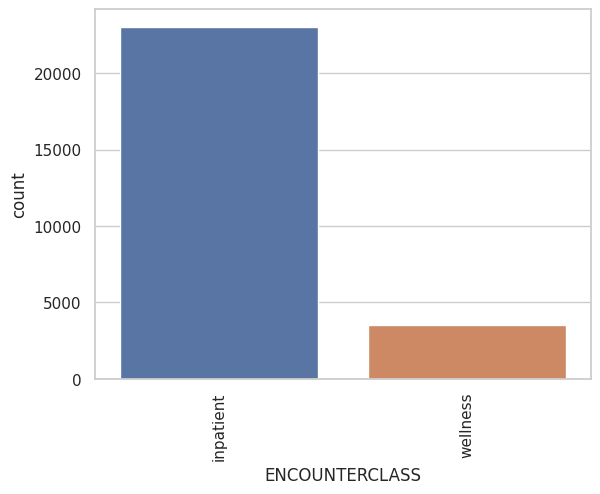

In [ ]:
# Plotting the distribution of encounter classes
g3 = sns.countplot(x=encounters_df['ENCOUNTERCLASS'])
g3.set_xticklabels(
    labels= list(set(encounters_df['ENCOUNTERCLASS'])), rotation=90)

### Imaging Studies


In [ ]:
# Viewing the dataset
imaging_studies_df.head()

,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,fe380e56-a583-4133-90e2-f2519b973996,1983-08-10,7e2c6949-dce9-44be-b6ef-50aca95840d7,e20e918a-c65a-4f28-9041-9dc331a30373,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,bf567838-d61d-4862-9921-fbb79b494cb2,2008-10-03,8742348d-72b0-40b3-a970-08e50b30e256,73aa0361-5499-469f-b80d-afeb0ccbe6db,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
2,c210ff52-e285-43e5-8612-d202914f9913,2009-04-01,8742348d-72b0-40b3-a970-08e50b30e256,986a5bae-3e06-4fae-a7dc-d6d30b4d4a65,51185008,Thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
3,3822e2be-5ff2-40a0-9e79-a241bbfee498,2009-04-01,8742348d-72b0-40b3-a970-08e50b30e256,f6a103ad-0a86-4224-b2d3-afb3095e0444,261179002,Thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
4,cad5e6e6-a50b-4bca-8073-99ea37816066,2009-04-01,8742348d-72b0-40b3-a970-08e50b30e256,f6a103ad-0a86-4224-b2d3-afb3095e0444,51185008,Thoracic structure,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation


### Immunizations

In [ ]:
# Viewing the dataset
immunizations_df.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,140,Influenza seasonal injectable preservative ...,140.52
1,2020-01-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,20032279-0deb-41f9-bea4-93710396eb95,83,Hep A ped/adol 2 dose,140.52
2,2019-07-08,9bcf6ed5-d808-44af-98a0-7d78a29ede72,26f579ef-1dc8-4899-b8fc-13f98eaeee55,140,Influenza seasonal injectable preservative ...,140.52
3,2020-02-21,5163c501-353c-4a82-b863-a3f1df2d6cf1,929c6964-3c16-4813-875a-88619372e9ce,140,Influenza seasonal injectable preservative ...,140.52
4,2020-02-21,5163c501-353c-4a82-b863-a3f1df2d6cf1,929c6964-3c16-4813-875a-88619372e9ce,114,meningococcal MCV4P,140.52


In [ ]:
# Shape of dataset
print("The size of Immunizations dataset is: ", immunizations_df.shape)

The size of Immunizations dataset is:  (168160, 6)


In [ ]:
# Different conditions identified in immunizations
list(set(immunizations_df['DESCRIPTION']))

['Hep B  adult',
 'DTaP',
 'MMR',
 'Influenza  seasonal  injectable  preservative free',
 'IPV',
 'pneumococcal polysaccharide vaccine  23 valent',
 'Hib (PRP-OMP)',
 'Hep B  adolescent or pediatric',
 'rotavirus  monovalent',
 'Td (adult) preservative free',
 'zoster',
 'HPV  quadrivalent',
 'Tdap',
 'Pneumococcal conjugate PCV 13',
 'Hep A  ped/adol  2 dose',
 'Hep A  adult',
 'varicella',
 'meningococcal MCV4P']

In [ ]:
immunizations_df['DESCRIPTION'].value_counts() 

Influenza  seasonal  injectable  preservative free    106564
Td (adult) preservative free                            9815
Pneumococcal conjugate PCV 13                           5747
DTaP                                                    5735
IPV                                                     4962
meningococcal MCV4P                                     4010
Hib (PRP-OMP)                                           3615
HPV  quadrivalent                                       3494
Hep B  adolescent or pediatric                          3490
zoster                                                  3469
Hep B  adult                                            2883
Hep A  adult                                            2624
MMR                                                     2374
varicella                                               2333
Hep A  ped/adol  2 dose                                 2263
rotavirus  monovalent                                   2261
pneumococcal polysacchar

### Medications

In [ ]:
# Viewing the dataset
medications_df.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2019-10-30,2019-11-13,1ff7f10f-a204-4bb1-aa72-dd763fa99482,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,759cfd9c-b40b-45df-a5b2-fca418027a6a,308182,Amoxicillin 250 MG Oral Capsule,7.05,0.0,1,7.05,NaN,NaN
1,2019-10-30,2019-11-13,1ff7f10f-a204-4bb1-aa72-dd763fa99482,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,759cfd9c-b40b-45df-a5b2-fca418027a6a,313820,Acetaminophen 160 MG Chewable Tablet,5.72,0.0,1,5.72,NaN,NaN
2,2020-02-12,2020-02-26,9bcf6ed5-d808-44af-98a0-7d78a29ede72,4d71f845-a6a9-3c39-b242-14d25ef86a8d,5d9dfe80-7edf-4181-9753-770e361934d1,313820,Acetaminophen 160 MG Chewable Tablet,5.25,0.0,1,5.25,NaN,NaN
3,2020-04-28,2020-05-08,9bcf6ed5-d808-44af-98a0-7d78a29ede72,4d71f845-a6a9-3c39-b242-14d25ef86a8d,794aac2b-0eb8-4c36-98bb-a4317b344e6e,834061,Penicillin V Potassium 250 MG Oral Tablet,13.90,0.0,1,13.90,43878008.0,Streptococcal sore throat (disorder)
4,2019-12-26,NaN,5163c501-353c-4a82-b863-a3f1df2d6cf1,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,66829d53-9d16-4f2c-82ad-bfb2409fdb25,978950,Natazia 28 Day Pack,29.52,0.0,5,147.60,NaN,NaN


In [ ]:
# Shape of the dataset
print("The size of Medications dataset is: ", medications_df.shape)

The size of Medications dataset is:  (4227723, 13)


In [ ]:
# Checking for NULLS
medications_df.isna().sum()

START                     0
STOP                 281580
PATIENT                   0
PAYER                     0
ENCOUNTER                 0
CODE                      0
DESCRIPTION               0
BASE_COST                 0
PAYER_COVERAGE            0
DISPENSES                 0
TOTALCOST                 0
REASONCODE           938609
REASONDESCRIPTION    938609
dtype: int64

In [ ]:
medications_df = medications_df.dropna(subset=['REASONDESCRIPTION'])
medications_df.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
3,2020-04-28,2020-05-08,9bcf6ed5-d808-44af-98a0-7d78a29ede72,4d71f845-a6a9-3c39-b242-14d25ef86a8d,794aac2b-0eb8-4c36-98bb-a4317b344e6e,834061,Penicillin V Potassium 250 MG Oral Tablet,13.90,0.0,1,13.90,43878008.0,Streptococcal sore throat (disorder)
5,2020-05-03,2020-05-17,5163c501-353c-4a82-b863-a3f1df2d6cf1,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,f2df2577-f1ff-4e0f-a467-8f72d494f478,313782,Acetaminophen 325 MG Oral Tablet,6.37,0.0,1,6.37,10509002.0,Acute bronchitis (disorder)
7,2020-02-19,NaN,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,4d71f845-a6a9-3c39-b242-14d25ef86a8d,b7455838-3607-47f4-aaa5-fd89abea7d29,2123111,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...,302.07,0.0,3,906.21,389087006.0,Hypoxemia (disorder)
9,2020-02-25,NaN,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,4d71f845-a6a9-3c39-b242-14d25ef86a8d,b7455838-3607-47f4-aaa5-fd89abea7d29,854252,1 ML Enoxaparin sodium 150 MG/ML Prefilled Syr...,263.49,0.0,3,790.47,706870000.0,Acute pulmonary embolism (disorder)
10,2019-12-05,2019-12-19,682077f3-bd6b-462d-ac1c-c394ca8240d2,4d71f845-a6a9-3c39-b242-14d25ef86a8d,1e84d5c6-e9af-4f7f-91f1-699a89c696be,313782,Acetaminophen 325 MG Oral Tablet,5.19,0.0,1,5.19,10509002.0,Acute bronchitis (disorder)


In [ ]:
# g4 = sns.countplot(x=medications_df['REASONDESCRIPTION'])
# g4.set_xticklabels(
#     labels= list(set(medications_df['REASONDESCRIPTION'])), rotation=90)

### Observations

In [ ]:
# Viewing the dataset
observations_df.head(50)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8302-2,Body Height,82.7,cm,numeric
1,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,29463-7,Body Weight,11.5,kg,numeric
3,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,77606-2,Weight-for-length Per age and sex,47.0,%,numeric
4,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,9843-4,Head Occipital-frontal circumference,46.9,cm,numeric
5,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8462-4,Diastolic Blood Pressure,76.0,mm[Hg],numeric
6,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8480-6,Systolic Blood Pressure,107.0,mm[Hg],numeric
7,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8867-4,Heart rate,68.0,/min,numeric
8,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,9279-1,Respiratory rate,13.0,/min,numeric
9,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,72166-2,Tobacco smoking status NHIS,Never smoker,NaN,text


In [ ]:
# Shape of the dataset
print("The size of Observations dataset is: ", observations_df.shape)

The size of Observations dataset is:  (16219969, 8)


In [ ]:
# Checking for NULLS
observations_df.isna().sum()

DATE                0
PATIENT             0
ENCOUNTER      436431
CODE                0
DESCRIPTION         0
VALUE               0
UNITS          833416
TYPE                0
dtype: int64

In [ ]:
# Unique vital categories
print(len(set(list(observations_df['DESCRIPTION']))))

227


In [ ]:
# Unique patients
print(len(set(list(observations_df['PATIENT']))))

124150


This means that we have 227 medical parameters 

In [ ]:
preproc_obs_df = observations_df.drop(columns = ['UNITS', 'TYPE', 'CODE'])

Number of rows in observations_df = 16219969 \
Number of unique patients = 124150 \
There are 227 unique parameters in the dataset \

However, many parameters have simply not been recorded for a large chunk of patients. 



In [ ]:
preproc_obs_df['DESCRIPTION'].value_counts()[:10]

Diastolic Blood Pressure                          470679
Systolic Blood Pressure                           470679
Body Weight                                       456354
Heart rate                                        456354
Respiratory rate                                  456354
Oxygen saturation in Arterial blood               422998
Body temperature                                  348419
Glomerular filtration rate/1.73 sq M.predicted    254418
Protein [Mass/volume] in Serum or Plasma          254187
Albumin [Mass/volume] in Serum or Plasma          254187
Name: DESCRIPTION, dtype: int64

Based on the above value counts, top 10 most frequently recorded vitals have been chosen which will be pivoted to form the columns for our new dataframe. If more than 10 columns were chosen, there were some features where more than 60% of the data was missing and thus n was set to 10

In [ ]:
n = 10# set number of features
selected = preproc_obs_df['DESCRIPTION'].value_counts()[:n].index.tolist()
new_preproc_obs_df = preproc_obs_df[preproc_obs_df['DESCRIPTION'].isin(selected)]

In [ ]:
new_preproc_obs_df['VALUE'] = pd.to_numeric(new_preproc_obs_df.VALUE.astype(str).str.replace(',',''), errors='coerce').astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
new_preproc_obs_df.dtypes

DATE           object
PATIENT        object
ENCOUNTER      object
DESCRIPTION    object
VALUE           int64
dtype: object

In [ ]:
new_preproc_obs_df.isna().sum()

DATE           0
PATIENT        0
ENCOUNTER      0
DESCRIPTION    0
VALUE          0
dtype: int64

For patients who do not have a value for one of the parameters in the selected column, we will fill the value with 0

In [ ]:
# Pivot table
manual_obs_df = (new_preproc_obs_df.pivot_table(index=['DATE','PATIENT','ENCOUNTER'], 
                              columns=['DESCRIPTION'],
                              values='VALUE')
                 .reset_index()
                 .rename_axis(None, axis=1)) 

In [ ]:
manual_obs_df.head()

,DATE,PATIENT,ENCOUNTER,Albumin [Mass/volume] in Serum or Plasma,Body Weight,Body temperature,Diastolic Blood Pressure,Glomerular filtration rate/1.73 sq M.predicted,Heart rate,Oxygen saturation in Arterial blood,Protein [Mass/volume] in Serum or Plasma,Respiratory rate,Systolic Blood Pressure
0,1910-01-29,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,4c02af40-d93a-4196-ad4a-7ae5cad6b19e,NaN,4.0,NaN,81.0,NaN,92.0,NaN,NaN,13.0,130.0
1,1910-03-05,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,8b9c3cb9-2d4f-4975-81b3-cac3abf51c96,NaN,5.0,NaN,73.0,NaN,64.0,NaN,NaN,13.0,110.0
2,1910-05-07,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,5c27bdf5-80df-46cf-8daf-84b51343ab1f,NaN,6.0,NaN,78.0,NaN,86.0,NaN,NaN,13.0,123.0
3,1910-07-09,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,c9b07954-27b6-4148-b871-4fdb9dc7e049,NaN,7.0,NaN,79.0,NaN,83.0,NaN,NaN,13.0,107.0
4,1910-08-16,70639a2a-2749-484c-994c-ccf778345611,71eaab96-33c3-4123-916d-a992fcea61b4,NaN,5.0,NaN,83.0,NaN,95.0,NaN,NaN,12.0,136.0


In [ ]:
# Checking for NULLS
manual_obs_df.isna().sum()

DATE                                                   0
PATIENT                                                0
ENCOUNTER                                              0
Albumin [Mass/volume] in Serum or Plasma          293986
Body Weight                                        92582
Body temperature                                  200856
Diastolic Blood Pressure                           78259
Glomerular filtration rate/1.73 sq M.predicted    293757
Heart rate                                         92582
Oxygen saturation in Arterial blood               231664
Protein [Mass/volume] in Serum or Plasma          293986
Respiratory rate                                   92582
Systolic Blood Pressure                            78259
dtype: int64

In [ ]:
manual_obs_df.shape

(548157, 13)

### Patients

In [ ]:
patients_df.dtypes

Id                      object
BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
ZIP                    float64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
dtype: object

In [ ]:
# Shape of the dataset
print("The size of Patients dataset is: ", patients_df.shape)

The size of Patients dataset is:  (124150, 25)


In [ ]:
# Checking for NULLS
patients_df.isna().sum()

Id                          0
BIRTHDATE                   0
DEATHDATE              100000
SSN                         0
DRIVERS                 19686
PASSPORT                25386
PREFIX                  22531
FIRST                       0
LAST                        0
SUFFIX                 122868
MAIDEN                  89585
MARITAL                 36121
RACE                        0
ETHNICITY                   0
GENDER                      0
BIRTHPLACE                  0
ADDRESS                     0
CITY                        0
STATE                       0
COUNTY                      0
ZIP                     58322
LAT                         0
LON                         0
HEALTHCARE_EXPENSES         0
HEALTHCARE_COVERAGE         0
dtype: int64

Roughly:


*  80% of the data in the column `DEATHDATE` is null
*  90% of the data in the column `SUFFIX` is null
*  72% of the data in the column `MAIDEN` is null



[Text(0, 0, 'black'),
 Text(1, 0, 'white'),
 Text(2, 0, 'asian'),
 Text(3, 0, 'other'),
 Text(4, 0, 'native')]

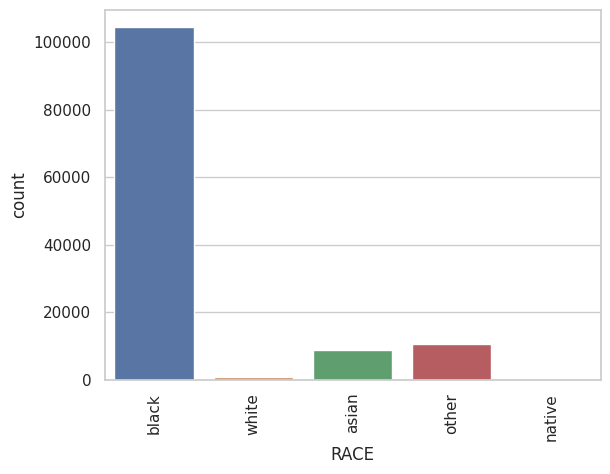

In [ ]:
# Plotting the racial distribution
g5 = sns.countplot(x=patients_df['RACE'])
g5.set_xticklabels(
    labels= list(set(patients_df['RACE'])), rotation=90)

OBSERVATION: The data for white individuals is disproportionately more than the data available for other races

[Text(0, 0, 'nonhispanic'), Text(1, 0, 'hispanic')]

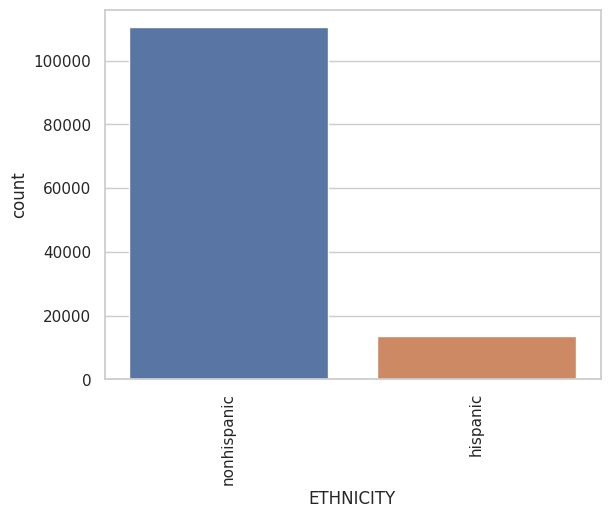

In [ ]:
# Plotting the distributions of ethnicities
g6 = sns.countplot(x=patients_df['ETHNICITY'])
g6.set_xticklabels(
    labels= list(set(patients_df['ETHNICITY'])), rotation=90)

OBSERVATION: The data for hispanic individuals is disproportionately less than the data available for other ethnicities

[Text(0, 0, 'F'), Text(1, 0, 'M')]

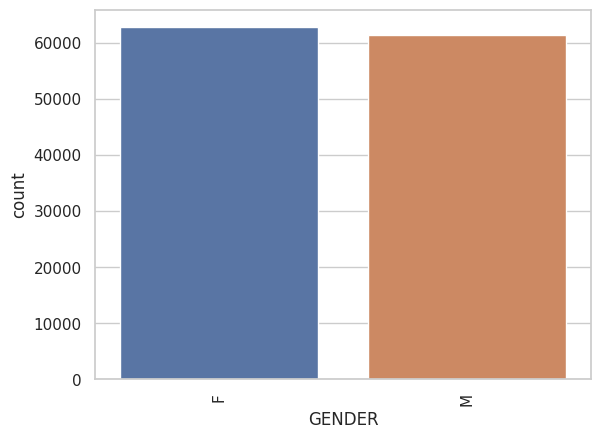

In [ ]:
# Plotting the gender distribution
g7 = sns.countplot(x=patients_df['GENDER'])
g7.set_xticklabels(
    labels= list(set(patients_df['GENDER'])), rotation=90)

OBSERVATION: The number of observations for the two genders (Male and Female) in the dataset are almost equal 

In [ ]:
# Viewing the dataset
patients_df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,...,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08
1,9bcf6ed5-d808-44af-98a0-7d78a29ede72,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,...,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,94568.40,1870.72
2,5163c501-353c-4a82-b863-a3f1df2d6cf1,2004-01-09,NaN,999-73-2461,S99999063,NaN,NaN,Jimmie93,Harris789,NaN,...,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,375754.62,3131.44
3,cc3c806f-4a09-4a89-a990-4286450956be,1996-11-15,NaN,999-60-7372,S99924941,X9952947X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484758.46,3632.96
4,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,2019-06-12,NaN,999-81-4349,NaN,NaN,NaN,Karyn217,Mueller846,NaN,...,New Bedford Massachusetts US,570 Abshire Forge Suite 32,Colrain,Massachusetts,Franklin County,NaN,42.740220,-72.722648,24130.00,903.28


In [ ]:
# Dropping columns
patients_filtered_df = patients_df.drop(columns = ['DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'LAT', 'LON', 'BIRTHPLACE',	'ADDRESS']) 

In [ ]:
patients_filtered_df.dtypes
print(len(patients_filtered_df))

124150


In [ ]:
patients_filtered_df.to_csv('patients_filtered.csv')

### Payer Transitions

In [ ]:
# Viewing the dataset
payer_transitions_df.head()

,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,2017,2017,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
1,cc3c806f-4a09-4a89-a990-4286450956be,1996,2014,d47b3510-2895-3b70-9897-342d681c769d,Guardian
2,4dc153b6-bd07-49f3-bb4c-bad875b388a3,1992,2010,6e2f1a2d-27bd-3701-8d08-dae202c58632,Guardian
3,9d873139-72ec-4711-9ebd-f278e100a499,1989,1989,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NaN
4,682077f3-bd6b-462d-ac1c-c394ca8240d2,1983,2001,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Guardian


In [ ]:
payer_transitions_df = payer_transitions_df.dropna(subset=['OWNERSHIP'])
payer_transitions_df.head()

,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,2017,2017,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
1,cc3c806f-4a09-4a89-a990-4286450956be,1996,2014,d47b3510-2895-3b70-9897-342d681c769d,Guardian
2,4dc153b6-bd07-49f3-bb4c-bad875b388a3,1992,2010,6e2f1a2d-27bd-3701-8d08-dae202c58632,Guardian
4,682077f3-bd6b-462d-ac1c-c394ca8240d2,1983,2001,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Guardian
5,15eab0f6-a733-493d-9b4b-8dba8faa4565,1991,2009,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Guardian


[Text(0, 0, 'Guardian'), Text(1, 0, 'Self'), Text(2, 0, 'Spouse')]

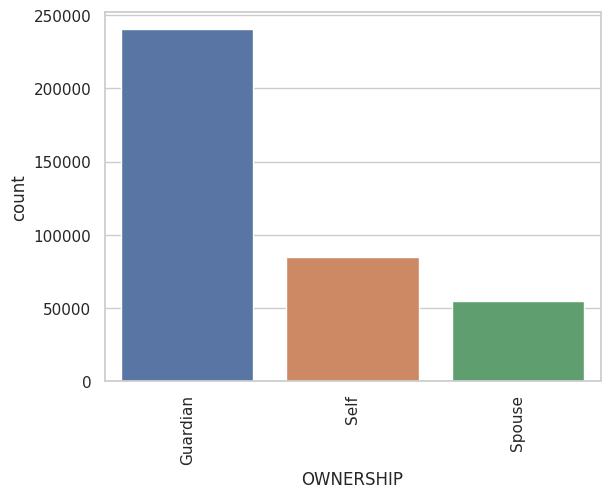

In [ ]:
# Plotting the distribution of Payer Ownership
g8 = sns.countplot(x=payer_transitions_df['OWNERSHIP'])
g8.set_xticklabels(
    labels= list(set(payer_transitions_df['OWNERSHIP'])), rotation=90)

### Payers

In [ ]:
# Viewing the dataset
payers_df.head()

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,REVENUE,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,4.531388e+07,2.485856e+07,1.953770e+08,...,0,150159,0,82736,0,34249,0,3071,0.490522,484500
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,5.846347e+08,1.018902e+08,9.435702e+08,...,0,1455673,0,911862,0,337691,0,25012,0.785927,3931632
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,3.315169e+08,1.821008e+08,1.994596e+09,...,0,607074,0,5071067,0,665206,0,52994,0.770179,8548752
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799,8.520899e+07,1.056451e+08,1.479080e+10,...,222875,0,591617,1560577,75944,778250,22797,32041,0.920409,8769672
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583,2.188510e+08,1.419202e+08,1.502221e+10,...,0,586516,0,1560056,0,769640,0,31127,0.918575,8414820


In [ ]:
payers_df.dtypes

Id                          object
NAME                        object
ADDRESS                     object
CITY                        object
STATE_HEADQUARTERED         object
ZIP                        float64
PHONE                       object
AMOUNT_COVERED             float64
AMOUNT_UNCOVERED           float64
REVENUE                    float64
COVERED_ENCOUNTERS           int64
UNCOVERED_ENCOUNTERS         int64
COVERED_MEDICATIONS          int64
UNCOVERED_MEDICATIONS        int64
COVERED_PROCEDURES           int64
UNCOVERED_PROCEDURES         int64
COVERED_IMMUNIZATIONS        int64
UNCOVERED_IMMUNIZATIONS      int64
UNIQUE_CUSTOMERS             int64
QOLS_AVG                   float64
MEMBER_MONTHS                int64
dtype: object

In [ ]:
# Checking for NULLS
payers_df.isna().sum()

Id                         0
NAME                       0
ADDRESS                    1
CITY                       1
STATE_HEADQUARTERED        1
ZIP                        1
PHONE                      1
AMOUNT_COVERED             0
AMOUNT_UNCOVERED           0
REVENUE                    0
COVERED_ENCOUNTERS         0
UNCOVERED_ENCOUNTERS       0
COVERED_MEDICATIONS        0
UNCOVERED_MEDICATIONS      0
COVERED_PROCEDURES         0
UNCOVERED_PROCEDURES       0
COVERED_IMMUNIZATIONS      0
UNCOVERED_IMMUNIZATIONS    0
UNIQUE_CUSTOMERS           0
QOLS_AVG                   0
MEMBER_MONTHS              0
dtype: int64

### Procedures

In [ ]:
# Viewing the dataset
procedures_df.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,430193006,Medication Reconciliation (procedure),495.80,NaN,NaN
1,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
2,2020-01-06,9bcf6ed5-d808-44af-98a0-7d78a29ede72,723060b3-7be8-4d12-8e1e-04f9da2c52d5,430193006,Medication Reconciliation (procedure),453.37,NaN,NaN
3,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
4,2020-04-28,9bcf6ed5-d808-44af-98a0-7d78a29ede72,794aac2b-0eb8-4c36-98bb-a4317b344e6e,117015009,Throat culture (procedure),2169.16,43878008.0,Streptococcal sore throat (disorder)


In [ ]:
# Checking for NULLS
procedures_df.isna().sum()

DATE                      0
PATIENT                   0
ENCOUNTER                 0
CODE                      0
DESCRIPTION               0
BASE_COST                 0
REASONCODE           236831
REASONDESCRIPTION    236831
dtype: int64

In [ ]:
procedures_df = procedures_df.dropna(subset=['REASONDESCRIPTION'])
procedures_df.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
1,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
3,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
4,2020-04-28,9bcf6ed5-d808-44af-98a0-7d78a29ede72,794aac2b-0eb8-4c36-98bb-a4317b344e6e,117015009,Throat culture (procedure),2169.16,43878008.0,Streptococcal sore throat (disorder)
5,2020-03-10,5163c501-353c-4a82-b863-a3f1df2d6cf1,f26c8d54-0e02-402b-9e98-13be78607b6b,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
7,2020-02-27,cc3c806f-4a09-4a89-a990-4286450956be,12a6479c-c830-44a4-a6e6-1db0d5b0d815,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19


In [ ]:
# Keeping only rows for COVID-19
procedures_df = procedures_df.loc[((procedures_df['REASONDESCRIPTION'] == 'COVID-19') | (procedures_df['REASONDESCRIPTION'] == 'Suspected COVID-19'))]
procedures_df.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
1,2020-03-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
3,2020-03-13,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
5,2020-03-10,5163c501-353c-4a82-b863-a3f1df2d6cf1,f26c8d54-0e02-402b-9e98-13be78607b6b,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
7,2020-02-27,cc3c806f-4a09-4a89-a990-4286450956be,12a6479c-c830-44a4-a6e6-1db0d5b0d815,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
10,2020-02-19,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,8851313a-7276-49a2-ad6d-c672b3f6ebb5,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19


In [ ]:
procedures_df['DESCRIPTION'].value_counts()

Face mask (physical object)          91039
Transfusion of plasma (procedure)      143
Name: DESCRIPTION, dtype: int64

### Providers

In [ ]:
# Viewing the dataset
providers_df.head()

,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
0,4781b3e5-e13c-3ef0-945d-649abe044d47,ef58ea08-d883-3957-8300-150554edc8fb,Jeffrey461 Beer512,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,145353
1,a50f1afd-2a19-3f0f-a3f0-d9d8e51c6f9b,69176529-fd1f-3b3f-abce-a0a3626769eb,Allison818 Bednar518,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,277220
2,692c8e0d-d680-3c70-9dfd-dfc2cacf3db5,5e765f2b-e908-3888-9fc7-df2cb87beb58,Angelena945 Torp761,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,203115
3,f4f87207-b74e-390e-b1c9-ea000db107c3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Denver542 Trantow673,M,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,249999
4,75322072-9b0a-302a-b343-326fd18aeb1c,e002090d-4e92-300e-b41e-7d1f21dee4c6,Carlos172 Rath779,M,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,279068


In [ ]:
# Checking for NULLS
providers_df.isna().sum()

Id              0
ORGANIZATION    0
NAME            0
GENDER          0
SPECIALITY      0
ADDRESS         0
CITY            0
STATE           0
ZIP             0
LAT             0
LON             0
UTILIZATION     0
dtype: int64

<Axes: ylabel='SPECIALITY'>

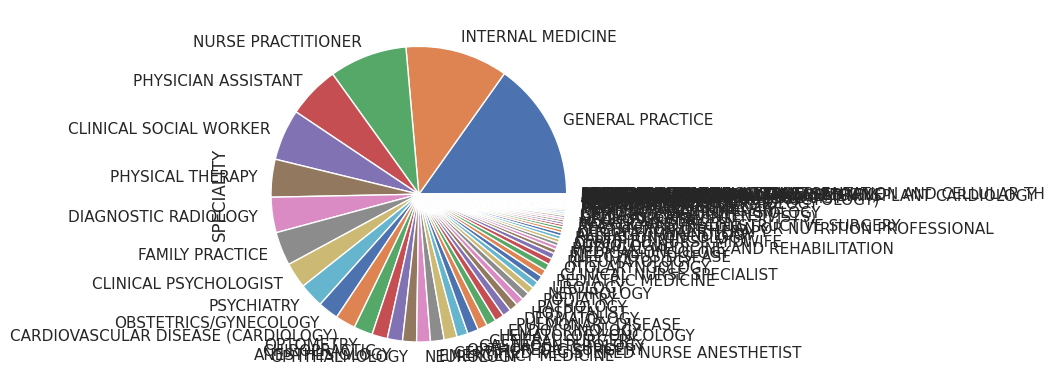

In [ ]:
# Pie Chart of provider specialities
providers_df['SPECIALITY'].value_counts().plot.pie()

In [ ]:
providers_df['SPECIALITY'].value_counts().sort_values(ascending=False)

GENERAL PRACTICE                                      9191
INTERNAL MEDICINE                                     6790
NURSE PRACTITIONER                                    5151
PHYSICIAN ASSISTANT                                   3448
CLINICAL SOCIAL WORKER                                3385
                                                      ... 
ANESTHESIOLOGY ASSISTANT                                 4
DENTIST                                                  3
NEUROPSYCHIATRY                                          2
PERIPHERAL VASCULAR DISEASE                              1
HEMATOPOIETIC CELL TRANSPLANTATION AND CELLULAR TH       1
Name: SPECIALITY, Length: 79, dtype: int64

<Axes: ylabel='CITY'>

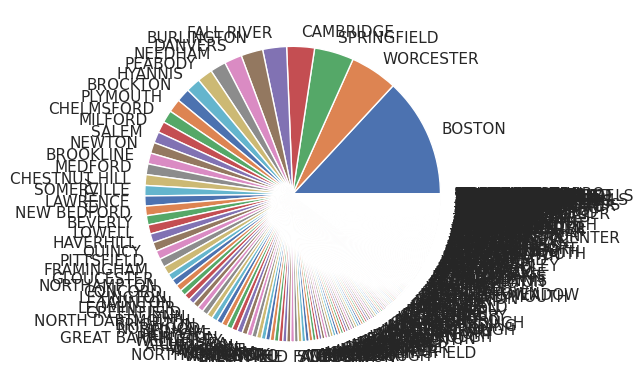

In [ ]:
# Pie chart of provider locations
providers_df['CITY'].value_counts().plot.pie()

In [ ]:
providers_df['CITY'].value_counts().sort_values(ascending=False)

BOSTON             7935
WORCESTER          3143
SPRINGFIELD        2611
CAMBRIDGE          1838
FALL RIVER         1580
                   ... 
W CONCORD             1
WEYMOUYH              1
WEST WAREHAM          1
PITTSFILED            1
NORTH ATTLEBORO       1
Name: CITY, Length: 407, dtype: int64

### Supplies

In [ ]:
# Viewing the dataset
supplies_df.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
0,2020-02-19,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,b7455838-3607-47f4-aaa5-fd89abea7d29,409534002,Disposable air-purifying respirator (physical ...,2
1,2020-02-19,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,b7455838-3607-47f4-aaa5-fd89abea7d29,713779008,Nitrile examination/treatment glove non-powde...,24
2,2020-02-19,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,b7455838-3607-47f4-aaa5-fd89abea7d29,469673003,Isolation gown single-use (physical object),12
3,2020-02-19,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,b7455838-3607-47f4-aaa5-fd89abea7d29,706724001,Face shield (physical object),2
4,2020-02-19,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,b7455838-3607-47f4-aaa5-fd89abea7d29,419343004,Alcohol disinfectant (substance),1


In [ ]:
# Checking for NULLS
supplies_df.isna().sum()

DATE           0
PATIENT        0
ENCOUNTER      0
CODE           0
DESCRIPTION    0
QUANTITY       0
dtype: int64

<Axes: ylabel='DESCRIPTION'>

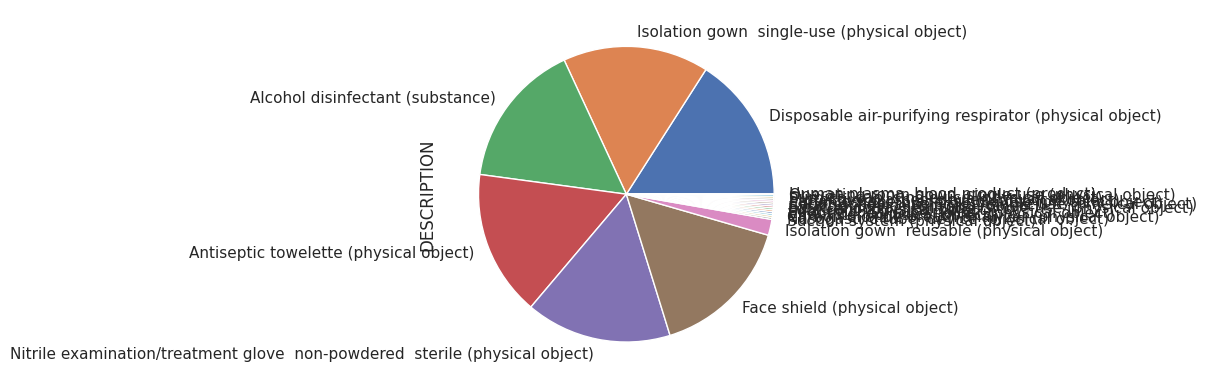

In [ ]:
# Pie chart of supplies and their frequencies
supplies_df['DESCRIPTION'].value_counts().plot.pie()

## Creating a main dataframe with vitals for each patient encounter

In [ ]:
## using X = manual_obs_df ; Y = encounters_df['DESCRIPTION]
manual_obs_df.head()

,DATE,PATIENT,ENCOUNTER,Albumin [Mass/volume] in Serum or Plasma,Body Weight,Body temperature,Diastolic Blood Pressure,Glomerular filtration rate/1.73 sq M.predicted,Heart rate,Oxygen saturation in Arterial blood,Protein [Mass/volume] in Serum or Plasma,Respiratory rate,Systolic Blood Pressure
0,1910-01-29,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,4c02af40-d93a-4196-ad4a-7ae5cad6b19e,NaN,4.0,NaN,81.0,NaN,92.0,NaN,NaN,13.0,130.0
1,1910-03-05,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,8b9c3cb9-2d4f-4975-81b3-cac3abf51c96,NaN,5.0,NaN,73.0,NaN,64.0,NaN,NaN,13.0,110.0
2,1910-05-07,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,5c27bdf5-80df-46cf-8daf-84b51343ab1f,NaN,6.0,NaN,78.0,NaN,86.0,NaN,NaN,13.0,123.0
3,1910-07-09,4d32241c-5fc5-4b5d-b90e-1e6d13f3f976,c9b07954-27b6-4148-b871-4fdb9dc7e049,NaN,7.0,NaN,79.0,NaN,83.0,NaN,NaN,13.0,107.0
4,1910-08-16,70639a2a-2749-484c-994c-ccf778345611,71eaab96-33c3-4123-916d-a992fcea61b4,NaN,5.0,NaN,83.0,NaN,95.0,NaN,NaN,12.0,136.0


In [ ]:
encounters_df['DESCRIPTION'].value_counts()

Hospital admission for isolation (procedure)       18177
Admission to intensive care unit (procedure)        3677
Death Certification                                 3520
Hospital admission  for observation (procedure)     1180
Name: DESCRIPTION, dtype: int64

In [ ]:
# Merging to get a main dataframe
main_df = manual_obs_df.merge(encounters_df, left_on = 'ENCOUNTER', right_on = 'Id', how='inner')

In [ ]:
main_df.dtypes

DATE                         object
PATIENT_x                    object
ENCOUNTER                    object
Body Weight                  object
Diastolic Blood Pressure    float64
Heart rate                   object
Respiratory rate             object
Systolic Blood Pressure     float64
Id                           object
START                        object
STOP                         object
PATIENT_y                    object
ORGANIZATION                 object
PROVIDER                     object
PAYER                        object
ENCOUNTERCLASS               object
CODE                          int64
DESCRIPTION                  object
BASE_ENCOUNTER_COST         float64
TOTAL_CLAIM_COST            float64
PAYER_COVERAGE              float64
REASONCODE                  float64
REASONDESCRIPTION            object
dtype: object

In [ ]:
main_df = main_df.drop(columns=['PATIENT_y', 'Id'])

In [ ]:
main_df.shape

(235858, 26)

In [ ]:
# Saving main dataframe
main_df.to_csv('main_5_df')